In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import statistics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [35]:
def split_test_train(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train,X_test,y_train,y_test

In [36]:
def standard_scaler(X_train,X_test):
    sc_X = StandardScaler()
    X_train_scale = sc_X.fit_transform(X_train)
    X_test_scale = sc_X.transform(X_test)
    return X_train_scale,X_test_scale

In [37]:
#Univariate Selection - 2,3,4,5
def univariate_selection(X_train,y_train):
    bestfeatures = SelectKBest(score_func=chi2, k=5)
    fit = bestfeatures.fit(X_train, y_train)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X_train.columns)
    # concat two dataframes for better visualization
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
    print(featureScores.nlargest(4, 'Score'))

In [38]:
#RFE-2,5,6,15
def RFE_col(X_train,y_train):
    classifier = LogisticRegression(random_state=0)
    rfe = RFE(classifier, 4)
    fit = rfe.fit(X_train, y_train)
    print("Num Features: %d" % fit.n_features_)
    print("Selected Features: %s" % fit.support_)
    print("Feature Ranking: %s" % fit.ranking_)
    rfe_rank = fit.ranking_

In [39]:
#PCA 4,11,9,17
def PCA_col(X_train,y_train):
    pca_example=PCA().fit(X_train)
    print("Explained_variance_ratio")
    print(pca_example.explained_variance_ratio_)
    pca = PCA(n_components=4).fit(X_train)
    n_pcs = pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    initial_feature_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                             '17']
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
    # using LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i + 1): most_important_names[i] for i in range(n_pcs)}
    # build the dataframe
    df = pd.DataFrame(sorted(dic.items()))
    print(df)

In [40]:
#Decision Tree-2,3,8,4
def decision_tree(X_train,y_train):
    model = ExtraTreesClassifier()
    model.fit(X_train, y_train)
    print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers
    # plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    print("Feature importance")
    print(feat_importances)
    plt.show()

In [41]:
#Logistic regression
def logistic_regression(X_train,y_train,X_test,y_test):
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_test, y_test, cv=10)
    print("SCORE:")
    print(score)
    print("Average score:")
    print(statistics.mean(score))

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    #plt.rcParams['font.size'] = 12
    #plt.hist(score, bins=8)

    # x-axis limit from 0 to 1
    #plt.xlim(0, 1)
    #plt.title('Histogram of predicted probabilities')
    #plt.xlabel('Predicted probability of diabetes')
    #plt.ylabel('Frequency')
    #plt.show()

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)


In [42]:
#Process data
def process_data(X,y):
    X_train, X_test, y_train, y_test = split_test_train(X, y)
    X_train_scale, X_test_scale = standard_scaler(X_train, X_test)
    logistic_regression(X_train_scale, y_train, X_test_scale, y_test)

In [43]:
if __name__ == "__main__":
    dataset = pd.read_csv("csv_result-diabetic_dataset.csv")

    # all col
    X = dataset.iloc[:, 1:19]
    y = dataset.iloc[:, 20]
    # random
    array = random.sample(range(0, 17), 4)
    X_random = dataset.iloc[:, [array[0], array[1], array[2],array[3]]]
    y_random = dataset.iloc[:, 20]

    # Univariate Selection
    X_unvariate_selection = dataset.iloc[:, [2, 3, 4, 5]]
    y_unvariate_selection = dataset.iloc[:, 20]

    # RFE
    X_rfe = dataset.iloc[:, [2,5, 6, 15]]
    y_rfe = dataset.iloc[:, 20]

    # PCA
    X_PCA = dataset.iloc[:, [5,9,11, 17]]
    y_PCA = dataset.iloc[:, 20]

    # DecisionTree
    X_dt = dataset.iloc[:, [2, 3, 4, 8]]
    y_dt = dataset.iloc[:, 20]

In [44]:
  X_train, X_test, y_train, y_test=split_test_train(X,y)

In [45]:
    univariate_selection(X_train, y_train)

  Specs        Score
2     2  1253.345935
3     3   957.488480
4     4   709.028122
5     5   468.943310


In [46]:

    X_train_scale,X_test_scale=standard_scaler(X_train,X_test)

In [47]:

    RFE_col(X_train_scale,y_train)


Num Features: 4
Selected Features: [False False  True False  True  True False False False False False False
 False False  True False False False]
Feature Ranking: [ 9 13  1  3  1  1  2  6  8  7 12 11 10  5  1  4 15 14]


In [48]:

    PCA_col(X_train_scale,y_train)
 

Explained_variance_ratio
[3.35348706e-01 2.71163043e-01 1.13669334e-01 6.34021712e-02
 5.67575413e-02 5.43766500e-02 4.41283785e-02 2.80075120e-02
 1.35179628e-02 8.09099932e-03 5.67989663e-03 2.28959760e-03
 1.25110638e-03 1.04579670e-03 8.43398083e-04 2.51960364e-04
 1.18928838e-04 5.70175310e-05]
     0   1
0  PC1   5
1  PC2  11
2  PC3   9
3  PC4  17


[0.00233622 0.01259282 0.10088383 0.08106449 0.06494112 0.06330133
 0.06328555 0.0661312  0.07345728 0.06391072 0.05898291 0.05573794
 0.0492949  0.04536732 0.04578029 0.03852635 0.05632478 0.05808094]
Feature importance
0     0.002336
1     0.012593
2     0.100884
3     0.081064
4     0.064941
5     0.063301
6     0.063286
7     0.066131
8     0.073457
9     0.063911
10    0.058983
11    0.055738
12    0.049295
13    0.045367
14    0.045780
15    0.038526
16    0.056325
17    0.058081
dtype: float64


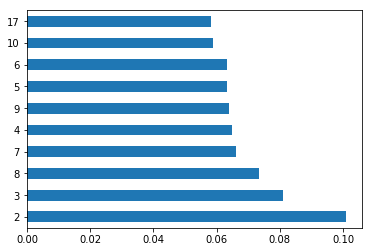

In [49]:

    decision_tree(X_train_scale,y_train)


In [50]:
print("Sve kolone>>>>>>>>>")
logistic_regression(X_train_scale,y_train,X_test_scale,y_test)
  

Sve kolone>>>>>>>>>
SCORE:
[0.75       0.7826087  0.69565217 0.69565217 0.82608696 0.7826087
 0.65217391 0.69565217 0.7826087  0.73913043]
Average score:
0.7402173913043478
Confusion Matrix:
[[89 17]
 [36 89]]


In [51]:
print("Univariate Selection>>>>>>")
process_data(X_unvariate_selection, y_unvariate_selection)
 

Univariate Selection>>>>>>
SCORE:
[0.66666667 0.69565217 0.73913043 0.69565217 0.65217391 0.7826087
 0.82608696 0.60869565 0.73913043 0.65217391]
Average score:
0.7057971014492753
Confusion Matrix:
[[93 24]
 [35 79]]


In [52]:
print("Nasumicno izabranih 5 kolona>>>>>>")
process_data(X_random,y_random)
  

Nasumicno izabranih 5 kolona>>>>>>
SCORE:
[0.58333333 0.47826087 0.82608696 0.60869565 0.65217391 0.73913043
 0.60869565 0.52173913 0.60869565 0.73913043]
Average score:
0.6365942028985507
Confusion Matrix:
[[71 22]
 [59 79]]


In [53]:
print("PCA>>>>>>")
process_data(X_PCA,y_PCA)
 

PCA>>>>>>
SCORE:
[0.625      0.69565217 0.65217391 0.60869565 0.56521739 0.69565217
 0.69565217 0.60869565 0.73913043 0.39130435]
Average score:
0.6277173913043478
Confusion Matrix:
[[65 52]
 [36 78]]


In [54]:
print("RFE>>>>>>")
process_data(X_rfe,y_rfe)

RFE>>>>>>
SCORE:
[0.70833333 0.56521739 0.69565217 0.60869565 0.7826087  0.60869565
 0.52173913 0.43478261 0.60869565 0.65217391]
Average score:
0.6186594202898551
Confusion Matrix:
[[75 27]
 [50 79]]


In [55]:
print("Decision tree>>>>>")
process_data(X_dt,y_dt)

Decision tree>>>>>
SCORE:
[0.66666667 0.60869565 0.69565217 0.52173913 0.69565217 0.69565217
 0.7826087  0.47826087 0.73913043 0.60869565]
Average score:
0.6492753623188405
Confusion Matrix:
[[83 32]
 [41 75]]
